# Analysis Project: Picogreen Concentration vs. User

In [1]:
#Import necessary functions
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#Makes a white backround with gray horizontal gridmarks at y-values
sns.set_style("whitegrid")

In [2]:
#ps = patch_seq csv file
ps = pd.read_csv("patch_seq_log_mouse.csv")

In [3]:
#list_initial = list with specific columns used from csv file
list_initial = ["Date", "User", "Rig #", "Picogreen conc. (pg/uL)", "PCR cycles", "SM_QC_PF", "Bad dates"]
ps = ps[list_initial]
ps.head()

,Date,User,Rig #,Picogreen conc. (pg/uL),PCR cycles,SM_QC_PF,Bad dates
0,170104,P1,5,NaN,18.0,pass,x
1,170104,P1,5,NaN,18.0,pass,x
2,170104,P1,5,NaN,18.0,pass,x
3,170104,P1,5,NaN,18.0,pass,x
4,170104,P1,5,NaN,18.0,pass,x


### Categorizing & Filtering the columns

In [4]:
#Changing Date Format
ps["Date"] = pd.to_datetime(ps["Date"], format = "%y%m%d", errors = "coerce")

#Changing String to Numerical
ps["Picogreen conc. (pg/uL)"] = pd.to_numeric(ps["Picogreen conc. (pg/uL)"].str.replace(' ',''), errors ='coerce')

#Categories
ps["User"] = ps["User"].astype("category")
ps["Rig #"] = ps["Rig #"].astype("category")
ps["PCR cycles"] = ps["PCR cycles"].astype("category")
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Bad dates"] = ps["Bad dates"].astype("category")

#Filtering Columns
ps = ps[ps["PCR cycles"] == 21]      #Shows 21 pcr cycles
ps = ps[ps["SM_QC_PF"] != "cnt"]     #Shows everything except (cnt = control)
ps = ps[ps["Bad dates"] != "x"]      #Shows everthing except (x = contaminated)

#Dropping blank columns
ps = ps.drop("Bad dates", 1)
ps.dropna(subset = ["User", "Picogreen conc. (pg/uL)", "SM_QC_PF"], inplace = True)
ps.head()

,Date,User,Rig #,Picogreen conc. (pg/uL),PCR cycles,SM_QC_PF
1634,2017-04-19,P2,6,71.0,21.0,fail
1635,2017-04-19,P2,6,608.0,21.0,pass
1636,2017-04-19,P2,6,6.0,21.0,fail
1637,2017-04-19,P2,6,1536.0,21.0,pass
1638,2017-04-19,P2,6,582.0,21.0,pass


In [5]:
ps.tail()

,Date,User,Rig #,Picogreen conc. (pg/uL),PCR cycles,SM_QC_PF
5034,2018-01-16,PA,7,1735.500,21.0,pass
5035,2018-01-16,PA,7,1177.308,21.0,pass
5036,2018-01-16,PA,7,1172.236,21.0,pass
5037,2018-01-17,P8,4,1389.753,21.0,pass
5038,2018-01-17,P8,4,1122.701,21.0,fail


## Info

In [6]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2590 entries, 1634 to 5038
Data columns (total 6 columns):
Date                       2590 non-null datetime64[ns]
User                       2590 non-null category
Rig #                      2578 non-null category
Picogreen conc. (pg/uL)    2590 non-null float64
PCR cycles                 2590 non-null category
SM_QC_PF                   2590 non-null category
dtypes: category(4), datetime64[ns](1), float64(1)
memory usage: 71.9 KB


In [7]:
ps.User.value_counts()

P2     667
P8     651
P1     547
P9     284
PB     181
PA     137
P6     110
P5      13
P6       0
P3       0
P0       0
Name: User, dtype: int64

## Swarmplot, Violinplot & Boxplot of Picogreen Concentration vs User

In [8]:
#Users = P1(Kristen), P2(Rusty), P8(Lindsay), P9(Lisa), PA(Ram), PB(Dijon)
#Restricted yield below 15000 (2 large outliers: 69000 & 16000)
#Data: 9/06/2017 - 1/17/2018 

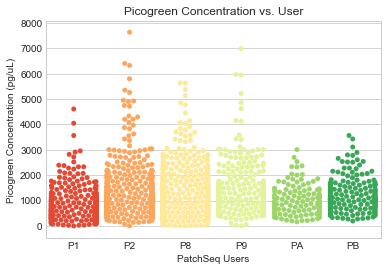

In [10]:
sp = sns.swarmplot(x = "User", y = "Picogreen conc. (pg/uL)", data = ps[ps["Picogreen conc. (pg/uL)"] < 15000], 
                   order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                   palette = "RdYlGn").set_title("Picogreen Concentration vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Picogreen Concentration (pg/uL)") #Redundant ylabel
plt.savefig("swarm_picogreen_conc_vs_user")

In [ ]:
vp = sns.violinplot(x = "User", y = "Picogreen conc. (pg/uL)", data = ps[ps["Picogreen conc. (pg/uL)"] < 15000], 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                    palette = "Spectral").set_title("Picogreen Concentration vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Picogreen Concentration (pg/uL)") #Redundant ylabel
plt.savefig("vio_picogreen_conc_vs_user")

In [ ]:
bp = sns.boxplot(x = "User", y = "Picogreen conc. (pg/uL)", data = ps[ps["Picogreen conc. (pg/uL)"] < 3000], 
                 order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                 palette = "Spectral").set_title("Picogreen Concentration vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Picogreen Concentration (pg/uL)") #Redundant ylabel
plt.savefig("box_picogreen_conc_vs_user")

## Extra Box Plot with outliers included

In [ ]:
#whis = np.inf includes the outliers
bp = sns.boxplot(x = "User", y = "Picogreen conc. (pg/uL)", data = ps[ps["Picogreen conc. (pg/uL)"] < 15000], 
                 order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                 palette = "Spectral", whis = np.inf).set_title("Picogreen Concentration vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Picogreen Concentration (pg/uL)") #Redundant ylabel

## Extras

In [ ]:
plt.style.available